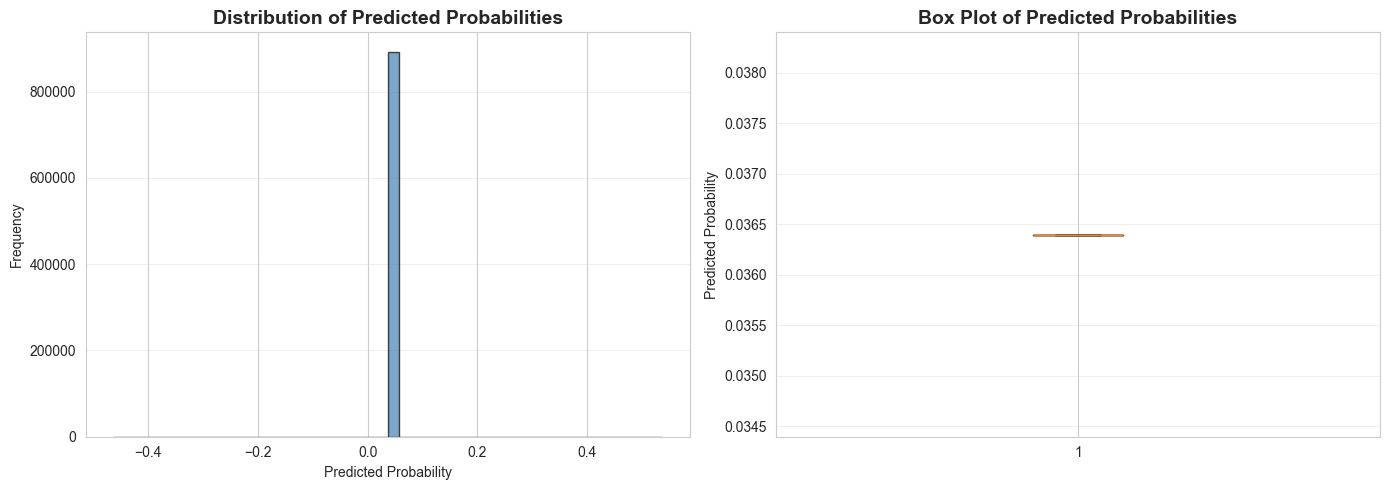

Submission statistics:
count    8.928160e+05
mean     3.640000e-02
std      6.938898e-18
min      3.640000e-02
25%      3.640000e-02
50%      3.640000e-02
75%      3.640000e-02
max      3.640000e-02
Name: target, dtype: float64


In [8]:
# Analyze submission probabilities
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of predictions
axes[0].hist(submission_df['target'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Predicted Probabilities', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted Probability')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', alpha=0.3)

# Box plot
axes[1].boxplot(submission_df['target'], vert=True)
axes[1].set_title('Box Plot of Predicted Probabilities', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Predicted Probability')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Submission statistics:")
print(submission_df['target'].describe())

## Sample Submission Distribution

In [9]:
# Analyze data types and column categories
print("TRAIN DATASET - Column Analysis:")
print("=" * 60)

# Separate by data type
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumeric columns ({len(numeric_cols)}):")
print(numeric_cols)

print(f"\nCategorical columns ({len(categorical_cols)}):")
print(categorical_cols)

# Show sample of numeric columns
print(f"\n\nNumeric columns statistics:")
print(train_df[numeric_cols].describe().T)

# Show unique values for categorical columns
if categorical_cols:
    print(f"\n\nCategorical columns unique values:")
    for col in categorical_cols:
        print(f"{col}: {train_df[col].nunique()} unique values")

TRAIN DATASET - Column Analysis:

Numeric columns (59):
['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']

Categorical columns (0):
[]


Numeric col

## Data Type Breakdown

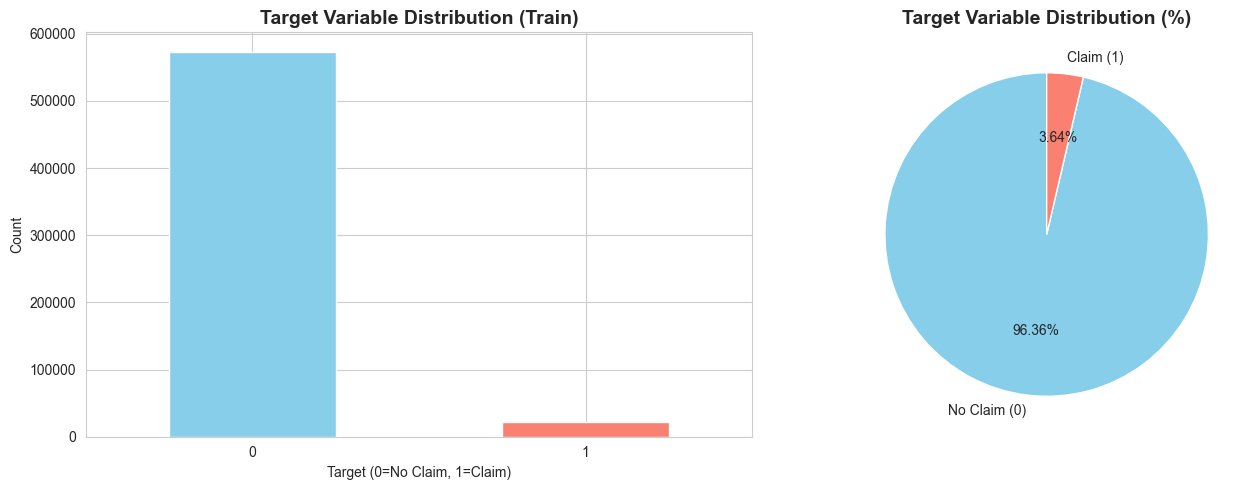


Target variable statistics:
target
0    573518
1     21694
Name: count, dtype: int64

Percentages:
target
0    96.355248
1     3.644752
Name: proportion, dtype: float64


In [10]:
# Analyze target variable in train dataset
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Value counts
train_df['target'].value_counts().plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Target Variable Distribution (Train)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Target (0=No Claim, 1=Claim)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['0', '1'], rotation=0)

# Percentage
target_pct = train_df['target'].value_counts(normalize=True) * 100
axes[1].pie(target_pct, labels=['No Claim (0)', 'Claim (1)'], autopct='%1.2f%%', 
            colors=['skyblue', 'salmon'], startangle=90)
axes[1].set_title('Target Variable Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nTarget variable statistics:")
print(train_df['target'].value_counts())
print(f"\nPercentages:")
print(train_df['target'].value_counts(normalize=True) * 100)

## Target Variable Distribution (Train Dataset)

In [11]:
# Check for missing values
print("Missing values in TRAIN:")
missing_train = train_df.isnull().sum()
print(missing_train[missing_train > 0])
if missing_train.sum() == 0:
    print("No missing values")

print("\nMissing values in TEST:")
missing_test = test_df.isnull().sum()
print(missing_test[missing_test > 0])
if missing_test.sum() == 0:
    print("No missing values")

print("\nMissing values in SUBMISSION:")
missing_sub = submission_df.isnull().sum()
print(missing_sub[missing_sub > 0])
if missing_sub.sum() == 0:
    print("No missing values")

Missing values in TRAIN:
Series([], dtype: int64)
No missing values

Missing values in TEST:
Series([], dtype: int64)
No missing values

Missing values in SUBMISSION:
Series([], dtype: int64)
No missing values


## Missing Values Analysis

In [12]:
# Display summary information for each dataset
print("=" * 80)
print("TRAIN DATASET")
print("=" * 80)
print(f"Shape: {train_df.shape}")
print(f"\nFirst few rows:")
print(train_df.head())
print(f"\nColumn names and types:")
print(train_df.dtypes)
print(f"\nBasic statistics:")
print(train_df.describe())

print("\n" + "=" * 80)
print("TEST DATASET")
print("=" * 80)
print(f"Shape: {test_df.shape}")
print(f"\nFirst few rows:")
print(test_df.head())
print(f"\nColumn names and types:")
print(test_df.dtypes)

print("\n" + "=" * 80)
print("SAMPLE SUBMISSION")
print("=" * 80)
print(f"Shape: {submission_df.shape}")
print(f"\nFirst few rows:")
print(submission_df.head())
print(f"\nTarget statistics:")
print(submission_df['target'].describe())

TRAIN DATASET
Shape: (595212, 59)

First few rows:
   id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   
1   9       0          1              1          7              0   
2  13       0          5              4          9              1   
3  16       0          0              1          2              0   
4  17       0          0              2          0              1   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
0              0              0              1              0  ...   
1              0              0              0              1  ...   
2              0              0              0              1  ...   
3              0              1              0              0  ...   
4              0              1              0              0  ...   

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           9           1           5       

## Dataset Overview

In [13]:
# Load the Three Data Files
data_path = Path('/Users/matt/aipm-1711/ds-safe-driver-prediction')

# Load train, test, and submission files
train_df = pd.read_csv(data_path / 'train.csv')
test_df = pd.read_csv(data_path / 'test.csv')
submission_df = pd.read_csv(data_path / 'sample_submission.csv')

print("Data files loaded successfully!")

Data files loaded successfully!


In [14]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

The columns in your data files are from the Porto Seguro’s Safe Driver Prediction competition. Here’s what they generally mean:

id: Unique identifier for each row (driver).
target: (train.csv only) 1 if the driver filed an insurance claim, 0 otherwise.
The remaining columns are anonymized features provided by the competition organizers. Their exact meanings are not public, but the naming convention gives some hints:

Columns like ps_ind_*, ps_reg_*, ps_car_*, ps_calc_*:
ps: Porto Seguro (the company)
ind: Individual (demographic info)
reg: Registration (possibly region or registration info)
car: Car-related features
calc: Calculated features (engineered by the organizers)
Suffixes:

bin: Binary (0 or 1)
cat: Categorical (discrete values, e.g., 0, 1, 2)
No suffix: Usually continuous or ordinal numeric values
Since the data is anonymized, the actual real-world meaning of each feature is unknown. You can only infer their importance and relationships through data analysis and modeling. If you want to see a full list of columns, I can extract and display them for you.

GPT-4.1 • 0x

# Data Visualization: Safe Driver Prediction Dataset

This notebook visualizes the three data files from the Porto Seguro's Safe Driver Prediction competition:
- **train.csv**: Training dataset with features and target variable
- **test.csv**: Test dataset with features (no target)
- **sample_submission.csv**: Sample submission format with predicted probabilities